## <center>Sprawozdanie 3</center>
<center>Adrian Janakiewicz</center>

***Imports***

In [76]:
import matplotlib.pyplot as plt
import time
from numpy import linspace
from math import exp, fabs
from scipy.optimize import bisect, newton
from pandas import DataFrame

<a id='zad1'></a>
***Zadanie 1.***   

$ f(x)   = \textrm{e}^{-2x} + x^2 - 1 $ <br>
$ f'(x)  = -2\textrm{e}^{-2x} + 2x$ <br>
$ f''(x) = 4\textrm{e}^{-2x} + 2$ 

In [77]:
def f(x):
    return exp(-2*x)+x*x-1

def f_1(x):
    return -2*exp(-2*x) + 2*x

def f_2(x):
    return 4*exp(-2*x) + 2

x = linspace(-1, 5)

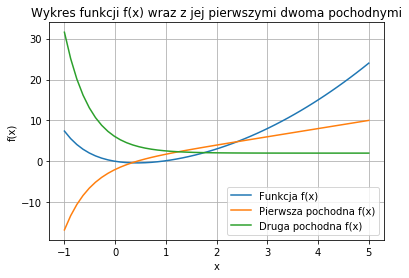

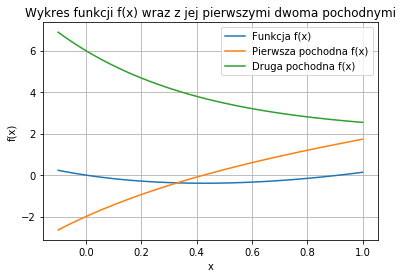

In [78]:
plt.plot(x, [f(i) for i in x], label='Funkcja f(x)')
plt.plot(x, [f_1(i) for i in x], label='Pierwsza pochodna f(x)')
plt.plot(x, [f_2(i) for i in x], label='Druga pochodna f(x)')
plt.title('Wykres funkcji f(x) wraz z jej pierwszymi dwoma pochodnymi')
plt.grid(b=None, axis='both')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()
x = linspace(-0.1, 1)
plt.plot(x, [f(i) for i in x], label='Funkcja f(x)')
plt.plot(x, [f_1(i) for i in x], label='Pierwsza pochodna f(x)')
plt.plot(x, [f_2(i) for i in x], label='Druga pochodna f(x)')
plt.title('Wykres funkcji f(x) wraz z jej pierwszymi dwoma pochodnymi')
plt.grid(b=None, axis='both')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

Pierwiastki tej funkcji szacuję na 0 i 0.9. 

<a id='zad2'></a>
***Zadanie 2.***   

<ul>Warunki zbierzności metody w przedziale izolacji pierwiastka:
    <li>Funkcja jest ciągła na danym przedziale domkniętym.</li>
    <li>Iloczyn wartości funkcji na krańcach szukanego przedziału musi być ujemny (tw. Darboux). </li>
    <li>Jeśli dodatkowo funkcja jest silnie monotoniczna w danym przedziale, to istnieje tam dokładnie jeden pierwiastek. </li>
</ul>

In [79]:
def bisection(function, a, b, delta, max_iter):
    if (function(a) * function(b)> 0) or (max_iter <= 0):
        return [float('nan'), -1]

    count = 0
    prev_val = function(b)
    mid = a + (b - a) / 2.0

    while (count < max_iter):
        count += 1
        mid = a + (b - a) / 2.0
        val = function(mid)

        if (val == 0.0):
            return [mid, count]

        if (function(a) * function(mid) < 0):
            b = mid
        else:
            a = mid


        if(fabs(val - prev_val) <= delta):
            return [mid,count]

        prev_val = val
        mid = a + (b - a) / 2.0

    return [mid, count]

In [102]:
t0 = time.perf_counter()
x1_b = bisection(f, -0.5, 0.3, 1e-10, 10000)
t1 = time.perf_counter()
x2_b = bisection(f,  0.4, 1.0, 1e-10, 10000)
t2 = time.perf_counter()

t1_b = t1 - t0
t2_b = t2 - t1

print(x1_b, "time:", t1_b)
print(x2_b, "time:", t2_b)

[1.3877787807814457e-17, 3] time: 0.00010565599950496107
[0.9165625830995852, 34] time: 0.00015033300041977782


In [81]:
t0 = time.perf_counter ()
x1_sb = bisect(f, -0.5, 0.3, maxiter=10000)
t1 = time.perf_counter ()
x2_sb = bisect(f,  0.4, 1.0, maxiter=10000)
t2 = time.perf_counter ()

t1_sb = t1 - t0
t2_sb = t2 - t1

print(x1, "time:", t1_sb)
print(x2, "time:", t2_sb)

2.959702672283758e-17 time: 0.0001950109999597771
0.9165625831056982 time: 0.00019983999936812324


<a id='zad3'></a>
***Zadanie 3.***  

<ul>Warunki zbierzności metody w przedziale izolacji pierwiastka:
    <li>Funkcja jest ciągła na danym przedziale domkniętym.</li>
    <li>Pierwsza i druga pochodna funkcji isnieją, są ciągłe i mają stały znak na danym przedziale domkniętym.</li>
    <li>Iloczyn wartości funkcji na krańcach szukanego przedziału musi być ujemny.</li>
</ul>

In [82]:
def stycznych_newton(function, a, b, delta, max_iter, f_prime, f_bis):
    if (function(a) * function(b)> 0) or (max_iter <= 0):
        return [float('nan'), -1]

    if(function(a)*f_bis(a) > 0):
        cur_x = a
    elif(function(b)*f_bis(b) > 0):
        cur_x = b
    else:
        return [float('nan'), -1]
    
    if(function(cur_x) == 0):
        return [cur_x, 0]
    
    count = 0
    prev_x = cur_x

    while (count < max_iter):
        count += 1

        cur_x = prev_x - function(prev_x)/f_prime(prev_x)

        if (function(cur_x) == 0.0):
            return [cur_x, count]

        
        if(fabs(cur_x - prev_x) <= delta):
            return [cur_x,count]

        prev_x = cur_x

    return [cur_x, count]

In [83]:
t0 = time.perf_counter ()
x1_n = stycznych_newton(f, -0.5, 0.3, 1e-10, 10000, f_1, f_2)
t1 = time.perf_counter ()
x2_n = stycznych_newton(f, 0.4, 1.0, 1e-10, 10000, f_1, f_2)
t2 = time.perf_counter ()

t1_n = t1 - t0
t2_n = t2 - t1

print(x1_n, "time:", t1_n)
print(x2_n, "time:", t2_n)

[-5.125559246038141e-17, 6] time: 0.00022700899990013568
[0.9165625831056982, 4] time: 0.00020044400025653886


In [84]:
t0 = time.perf_counter ()
x1_sn = newton(f, -0.5, f_1, maxiter=10000, fprime2=f_2)
t1 = time.perf_counter ()
x2_sn = newton(f, 1.0, f_1, maxiter=10000, fprime2=f_2)
t2 = time.perf_counter ()

t1_sn = t1 - t0
t2_sn = t2 - t1

print(x1_sn, "time:", t1_sn)
print(x2_sn, "time:", t2_sn)

2.959702672283758e-17 time: 0.00011893800001416821
0.9165625831056982 time: 0.00010807099988596747


<a id='zad4'></a>
***Zadanie 4.***  

<ul>Warunki zbierzności metody w przedziale izolacji pierwiastka:
    <li>Funkcja jest ciągła na danym przedziale domkniętym.</li>
    <li>Pierwsza i druga pochodna funkcji isnieją, są ciągłe i mają stały znak na danym przedziale domkniętym.</li>
    <li>Iloczyn wartości funkcji na krańcach szukanego przedziału musi być ujemny.</li>
</ul>

In [85]:
def siecznych(function, a, b, delta, max_iter, f_prime, f_bis):
    if (function(a) * function(b)> 0) or (max_iter <= 0):
        return [float('nan'), -1]

    if(function(a)*f_bis(a) > 0):
        prev_x_1 = a
        prev_x_2 = b
    elif(function(b)*f_bis(b) > 0):
        prev_x_1 = b
        prev_x_2 = a
    else:
        return [float('nan'), -1]

    if(function(prev_x_1) == 0):
        return [prev_x_1, 0]

    count = 0

    while (count < max_iter):
        count += 1
        cur_x = prev_x_1 - function(prev_x_1)/(function(prev_x_2) - function(prev_x_1)) * (prev_x_2 - prev_x_1)

        if (function(cur_x) == 0.0):
            return [cur_x, count]

        if(fabs(cur_x - prev_x_1) <= delta):
            return [cur_x,count]

        prev_x_2 = prev_x_1
        prev_x_1 = cur_x

    return [cur_x, count]

In [86]:
t0 = time.perf_counter ()
x1_s = siecznych(f, -0.5, 0.3, 1e-10, 10000, f_1, f_2)
t1 = time.perf_counter ()
x2_s = siecznych(f, 0.4, 1.0, 1e-10, 10000, f_1, f_2)
t2 = time.perf_counter ()

t1_s = t1 - t0
t2_s = t2 - t1


print(x1_s, "time:", t1_s)
print(x2_s, "time:", t2_s)

[-2.184509891877999e-17, 9] time: 0.00012859800062869908
[0.9165625831056982, 7] time: 0.0001515399999334477


In [87]:
print(x1_sn, "time:", t1_sn)
print(x2_sn, "time:", t2_sn)

2.959702672283758e-17 time: 0.00011893800001416821
0.9165625831056982 time: 0.00010807099988596747


#### Porównanie wyników działania wszystkich funkcji
<ul>Oznaczenia zmiennych:
    <li>*_b  - napisana przeze mnie metoda bisekcji</li>
    <li>*_sb - metoda bisekcji z biblioteki scipy.optimal</li>
    <li>*_n  - napisana przeze mnie metoda Newtona</li>
    <li>*_sn - metoda Newtona z biblioteki scipy.optimal</li>
    <li>*_s  - napisana przeze mnie metoda siecznych</li>
</ul>

In [103]:
df = DataFrame([[x1_b[0], x1_sb, x1_n[0], x1_sn, x1_s[0]],
                 [t1_b, t1_sb, t1_n, t1_sn, t1_s],
                 [x2_b[0], x2_sb, x2_n[0], x2_sn, x2_s[0]],
                 [t2_b, t2_sb, t2_n, t2_sn, t2_s]],
                 columns=["M. Bisekcji", "scipy.bisect", "M. Newton'a",
                          "scipy.newton", "M. Siecznych"],
                 index=["Wynik 1.","Czas 1. ","Wynik 2.","Czas 2. "])
print(df.round(15))

          M. Bisekcji  scipy.bisect  M. Newton'a  scipy.newton  M. Siecznych
Wynik 1.     0.000000      0.000000    -0.000000      0.000000     -0.000000
Czas 1.      0.000106      0.000195     0.000227      0.000119      0.000129
Wynik 2.     0.916563      0.916563     0.916563      0.916563      0.916563
Czas 2.      0.000150      0.000200     0.000200      0.000108      0.000152
